In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

# Import API key
from config import gkey

In [2]:
# Read Meteorite_Landings.csv file
meteorite_landings_df = pd.read_csv('Meteorite_Landings.csv')
meteorite_landings_df.head(10)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,01/01/1919 12:00:00 AM,32.10000,71.80000,"(32.1, 71.8)"
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,910.0,Fell,01/01/1949 12:00:00 AM,44.83333,95.16667,"(44.83333, 95.16667)"
7,Agen,392,Valid,H5,30000.0,Fell,01/01/1814 12:00:00 AM,44.21667,0.61667,"(44.21667, 0.61667)"
8,Aguada,398,Valid,L6,1620.0,Fell,01/01/1930 12:00:00 AM,-31.60000,-65.23333,"(-31.6, -65.23333)"
9,Aguila Blanca,417,Valid,L,1440.0,Fell,01/01/1920 12:00:00 AM,-30.86667,-64.55000,"(-30.86667, -64.55)"


In [3]:
# Count the row number of the dataset
len(meteorite_landings_df)

45716

In [4]:
# Modify the dataframe to grab "year" - split with " " space
year_split = meteorite_landings_df["year"].str.split(" ", n = 1, expand = True) 
year_split.head()

,0,1
0,01/01/1880,12:00:00 AM
1,01/01/1951,12:00:00 AM
2,01/01/1952,12:00:00 AM
3,01/01/1976,12:00:00 AM
4,01/01/1902,12:00:00 AM


In [5]:
# Modify the year_split to grab only "year" data - split with "/"
date_split = year_split[0].str.split("/", n = 2, expand = True) 
date_split.head()

,0,1,2
0,01,01,1880
1,01,01,1951
2,01,01,1952
3,01,01,1976
4,01,01,1902


In [6]:
# Name the date_split[2] to "Year", and add the data column to meteorite_landings dataframe
meteorite_landings_df["Year"]= date_split[2]
meteorite_landings_df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,Year
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)",1880
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)",1951
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)",1952
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)",1976
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)",1902


In [7]:
# Delete 'year' column and use 'Year' column for data analyses
del meteorite_landings_df["year"]
meteorite_landings_df.head()

,name,id,nametype,recclass,mass (g),fall,reclat,reclong,GeoLocation,Year
0,Aachen,1,Valid,L5,21.0,Fell,50.77500,6.08333,"(50.775, 6.08333)",1880
1,Aarhus,2,Valid,H6,720.0,Fell,56.18333,10.23333,"(56.18333, 10.23333)",1951
2,Abee,6,Valid,EH4,107000.0,Fell,54.21667,-113.00000,"(54.21667, -113.0)",1952
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,16.88333,-99.90000,"(16.88333, -99.9)",1976
4,Achiras,370,Valid,L6,780.0,Fell,-33.16667,-64.95000,"(-33.16667, -64.95)",1902


In [8]:
# Sort the dataset with Year
sort_meteorite_landings_df = meteorite_landings_df.sort_values(["Year"], ascending=True)
sort_meteorite_landings_df.head(10)

,name,id,nametype,recclass,mass (g),fall,reclat,reclong,GeoLocation,Year
704,Nogata,16988,Valid,L6,472.0,Fell,33.72500,130.75000,"(33.725, 130.75)",0860
679,Narni,16914,Valid,Stone-uncl,NaN,Fell,42.51667,12.51667,"(42.51667, 12.51667)",0920
278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,50.18333,12.73333,"(50.18333, 12.73333)",1399
856,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,45.48333,9.51667,"(45.48333, 9.51667)",1490
283,Ensisheim,10039,Valid,LL6,127000.0,Fell,47.86667,7.35000,"(47.86667, 7.35)",1491
1043,Valdinoce,24146,Valid,Stone-uncl,NaN,Fell,44.06667,12.10000,"(44.06667, 12.1)",1495
730,Oliva-Gandia,18012,Valid,Stone-uncl,NaN,Fell,39.00000,-0.03333,"(39.0, -0.03333)",1519
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,-27.46667,-60.58333,"(-27.46667, -60.58333)",1575
174,Castrovillari,5295,Valid,Stone-uncl,15000.0,Fell,39.80000,16.20000,"(39.8, 16.2)",1583
26174,Morito,16745,Valid,"Iron, IIIAB",10100000.0,Found,27.05000,-105.43333,"(27.05, -105.43333)",1600


In [9]:
# Set up a bin to create graphs based on Year
# But first, check data types
# sort_meteorite_landings_df.dtypes

In [10]:
# Change Year datatypes to integer
sort_meteorite_landings_df["Year"] = pd.to_numeric(sort_meteorite_landings_df["Year"])
sort_meteorite_landings_df.dtypes

name            object
id               int64
nametype        object
recclass        object
mass (g)       float64
fall            object
reclat         float64
reclong        float64
GeoLocation     object
Year           float64
dtype: object

In [11]:
# Drop missing data row
clean_meteorite_landings_df = sort_meteorite_landings_df.dropna(how="any")

In [12]:
# Set up a new data frame for Data Analyses
meteorite_map_df = clean_meteorite_landings_df[['name', 'id', 'mass (g)', 'reclat', 'reclong', 'Year']]
meteorite_map_df.dtypes

name         object
id            int64
mass (g)    float64
reclat      float64
reclong     float64
Year        float64
dtype: object

In [13]:
# Clean dataframe by dropping any N/A values
clean_meteorite_map = meteorite_map_df.dropna(how='any')
clean_meteorite_map

,name,id,mass (g),reclat,reclong,Year
704,Nogata,16988,472.0,33.72500,130.75000,860.0
278,Elbogen,7823,107000.0,50.18333,12.73333,1399.0
856,Rivolta de Bassi,22614,103.3,45.48333,9.51667,1490.0
283,Ensisheim,10039,127000.0,47.86667,7.35000,1491.0
5365,Campo del Cielo,5247,50000000.0,-27.46667,-60.58333,1575.0
...,...,...,...,...,...,...
30775,Northwest Africa 7856,57421,517.0,0.00000,0.00000,2013.0
30774,Northwest Africa 7855,57420,916.0,0.00000,0.00000,2013.0
30762,Northwest Africa 7812,57258,46.2,0.00000,0.00000,2013.0
30730,Northwest Africa 7755,57166,30.0,0.00000,0.00000,2013.0


In [14]:
# Create a new data frame for the meteor sightings map
meteor_df = meteorite_map_df[['mass (g)', 'reclat', 'reclong', 'Year']]

# Create a data frame that eliminates rows with values of 0
meteor_df = meteor_df.loc[meteor_df['reclat'] > 0]
meteor_df = meteor_df.loc[meteor_df['reclong'] > 0]
meteor_df = meteor_df.loc[meteor_df['mass (g)'] > 0]
meteor_df

,mass (g),reclat,reclong,Year
704,472.0,33.72500,130.75000,860.0
278,107000.0,50.18333,12.73333,1399.0
856,103.3,45.48333,9.51667,1490.0
283,127000.0,47.86667,7.35000,1491.0
174,15000.0,39.80000,16.20000,1583.0
...,...,...,...,...
38047,1684.0,32.76050,9.10020,2011.0
17260,212.0,19.77278,56.38982,2012.0
17402,25.6,32.89100,9.91300,2012.0
17401,50.1,32.80600,9.83300,2012.0


In [15]:
# Set up bins for Years
year_bins = [0, 999.999, 1699.999, 1799.999, 1899.999, 1999.999, 2020]
group_names = ["<1000", "1000-1699", "1700-1799", "1800-1899", "1900-1999", "2000-2020"]

# Add a new column named Year Ramge amd binnning based off the range
meteor_df["Year Range"] = pd.cut(meteor_df["Year"], year_bins, labels=group_names)
del meteor_df["Year"]
meteor_df

,mass (g),reclat,reclong,Year Range
704,472.0,33.72500,130.75000,<1000
278,107000.0,50.18333,12.73333,1000-1699
856,103.3,45.48333,9.51667,1000-1699
283,127000.0,47.86667,7.35000,1000-1699
174,15000.0,39.80000,16.20000,1000-1699
...,...,...,...,...
38047,1684.0,32.76050,9.10020,2000-2020
17260,212.0,19.77278,56.38982,2000-2020
17402,25.6,32.89100,9.91300,2000-2020
17401,50.1,32.80600,9.83300,2000-2020


In [16]:
# Check to see how many meteor sightings there are in each bin
meteor_count = meteor_df["Year Range"]
meteor_count.value_counts()

2000-2020    3393
1900-1999    2395
1800-1899     292
1700-1799      21
1000-1699      10
<1000           1
Name: Year Range, dtype: int64

Text(0, 0.5, 'Latitude')

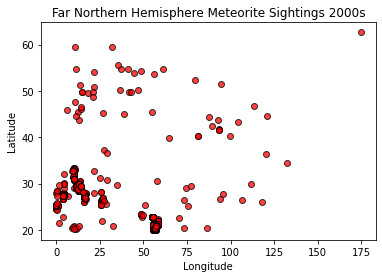

In [57]:
# Create a dataframe for the most recent bin, years 2000-2020
meteors2000s = meteor_df.loc[meteor_df["Year Range"] == "2000-2020", :]

# Separate meteor Northern Hemisphere sightings from 2000-2020 into far north/north hemispheres
far_north = meteors2000s[meteors2000s['reclat']>20]
north = meteors2000s[meteors2000s['reclat']<20]

# Create a scatter plot for Meteorite Sightings in the far northern hemisphere (>20 degrees latitude)
x_axis = far_north['reclong']
y_axis = far_north['reclat']

plt.scatter(x_axis, y_axis, marker='o', facecolors='red', edgecolors='black', alpha=0.75)
plt.title("Far Northern Hemisphere Meteorite Sightings 2000s")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

Text(0, 0.5, 'Latitude')

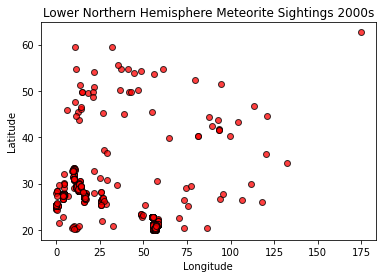

In [58]:
# Create a scatter plot for Meteorite Sightings in the lower northern hemisphere (<20 degrees latitude)
north = meteors2000s[meteors2000s['reclat']<20]
north_df = north[['reclat', 'reclong']]

plt.scatter(x_axis, y_axis, marker='o', facecolors='red', edgecolors='black', alpha=0.75)
plt.title("Lower Northern Hemisphere Meteorite Sightings 2000s")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

Text(0, 0.5, 'Latitude')

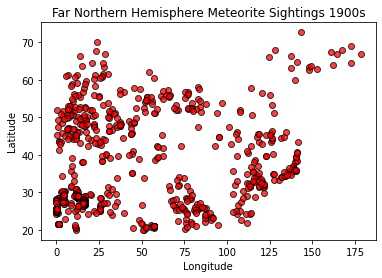

In [59]:
# Create a dataframe for the most recent bin, years 2000-2020
meteors1900s = meteor_df.loc[meteor_df["Year Range"] == "1900-1999", :]

# Separate meteor Northern Hemisphere sightings from 2000-2020 into far north/north hemispheres
far_north = meteors1900s[meteors1900s['reclat']>20]
north = meteors1900s[meteors1900s['reclat']<20]

# Create a scatter plot for Meteorite Sightings in the far northern hemisphere (>20 degrees latitude)
x_axis = far_north['reclong']
y_axis = far_north['reclat']

plt.scatter(x_axis, y_axis, marker='o', facecolors='red', edgecolors='black', alpha=0.75)
plt.title("Far Northern Hemisphere Meteorite Sightings 1900s")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

Text(0, 0.5, 'Latitude')

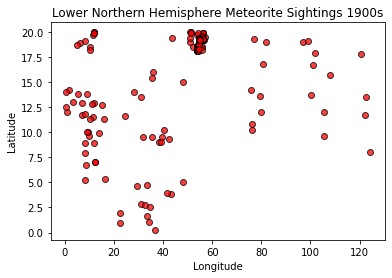

In [60]:
# Create a scatter plot for Meteorite Sightings in the lower northern hemisphere (<20 degrees latitude)
north = meteors1900s[meteors1900s['reclat']<20]
x_axis = north['reclong']
y_axis = north['reclat']

plt.scatter(x_axis, y_axis, marker='o', facecolors='red', edgecolors='black', alpha=0.75)
plt.title("Lower Northern Hemisphere Meteorite Sightings 1900s")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

Text(0, 0.5, 'Latitude')

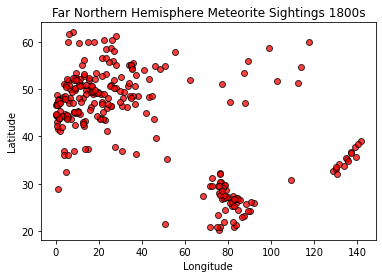

In [61]:
# Create a dataframe for the most recent bin, years 2000-2020
meteors1800s = meteor_df.loc[meteor_df["Year Range"] == "1800-1899", :]

# Separate meteor Northern Hemisphere sightings from 2000-2020 into far north/north hemispheres
far_north = meteors1800s[meteors1800s['reclat']>20]
north = meteors1800s[meteors1800s['reclat']<20]

# Create a scatter plot for Meteorite Sightings in the far northern hemisphere (>20 degrees latitude)
x_axis = far_north['reclong']
y_axis = far_north['reclat']

plt.scatter(x_axis, y_axis, marker='o', facecolors='red', edgecolors='black', alpha=0.75)
plt.title("Far Northern Hemisphere Meteorite Sightings 1800s")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

Text(0, 0.5, 'Latitude')

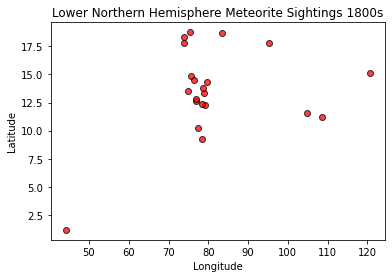

In [62]:
# Create a scatter plot for Meteorite Sightings in the lower northern hemisphere (<20 degrees latitude)
north = meteors1800s[meteors1800s['reclat']<20]
x_axis = north['reclong']
y_axis = north['reclat']

plt.scatter(x_axis, y_axis, marker='o', facecolors='red', edgecolors='black', alpha=0.75)
plt.title("Lower Northern Hemisphere Meteorite Sightings 1800s")
plt.xlabel("Longitude")
plt.ylabel("Latitude")